# AI vs Human NLP Project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Jitesh
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df=pd.read_csv('Training_Essay_Data.csv')

In [9]:
df.sample(5)

,text,generated
1924,Limiting car usage has so many benefits to giv...,0
17225,Some may say you should seek for guidance; how...,0
25401,Most people think of camping as a fun and exci...,1
2499,"]\n\nDear Senator [Senator's Last Name],\n\nI ...",1
1860,Cars have been part of our daily lives for dec...,0


In [12]:
df.shape

(29145, 2)

# Data cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


In [17]:
df.isnull().sum()

text         0
generated    0
dtype: int64

#### No Missing Values 

In [20]:
df.duplicated().sum()

1805

In [22]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

#### all duplicates are removed

In [27]:
df.head(25)

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
5,A Paradigm Shift in Urban Living In an era ...,1
6,Revolutionizing Urban Living In an age defi...,1
7,Pioneering Sustainable Urban Living In an a...,1
8,Reimagining Urban Living In a rapidly urban...,1
9,A Vision of Urban Sustainability In our rap...,1


In [29]:
# reset the index after removing duplicates, as index 22 is not present in the above dataset
df.reset_index(drop=True, inplace=True)

In [31]:
df.head(25)

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
5,A Paradigm Shift in Urban Living In an era ...,1
6,Revolutionizing Urban Living In an age defi...,1
7,Pioneering Sustainable Urban Living In an a...,1
8,Reimagining Urban Living In a rapidly urban...,1
9,A Vision of Urban Sustainability In our rap...,1


# Exploratory Data Analysis

In [34]:
df["generated"].value_counts()

generated
0    16122
1    11218
Name: count, dtype: int64

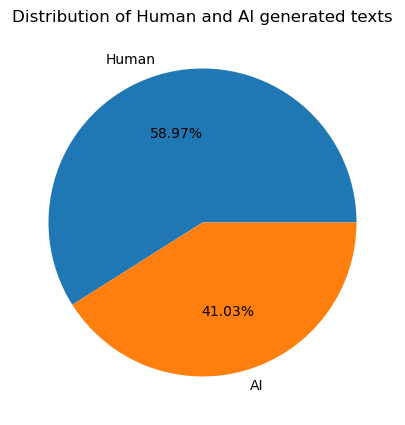

In [36]:
plt.figure(figsize=(10, 5))
plt.pie(df["generated"].value_counts(),labels=["Human","AI"],autopct='%0.2f%%')
plt.title("Distribution of Human and AI generated texts")
plt.show()

#### About 41% of texts are generated by AI. Data is mildly imbalanced, since dataset is large hence manageable

In [39]:
df.columns=["text","g"]

In [41]:
# no of characters in the story
df["n_c"]=df["text"].apply(len)

In [43]:
# no of words in the story
df["n_w"]=df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [45]:
df["n_s"]=df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [47]:
df[df["g"]==0][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,16122.000000,16122.000000,16122.000000
mean,2337.850205,464.742278,20.749721
std,1025.115700,202.267196,9.952730
min,239.000000,52.000000,1.000000
25%,1573.000000,314.000000,14.000000
50%,2182.000000,434.000000,20.000000
75%,2895.000000,574.000000,26.000000
max,9157.000000,1764.000000,102.000000


In [49]:
df[df["g"]==1][["n_c","n_w","n_s"]].describe()

,n_c,n_w,n_s
count,11218.000000,11218.000000,11218.000000
mean,1944.489214,340.615974,14.244696
std,825.142451,137.599515,6.268937
min,1.000000,1.000000,1.000000
25%,1304.250000,240.250000,10.000000
50%,2007.000000,352.000000,13.000000
75%,2355.000000,385.000000,18.000000
max,5078.000000,916.000000,96.000000


#### Mean no of sentences in the texts generated by AI are generally less than that of Human

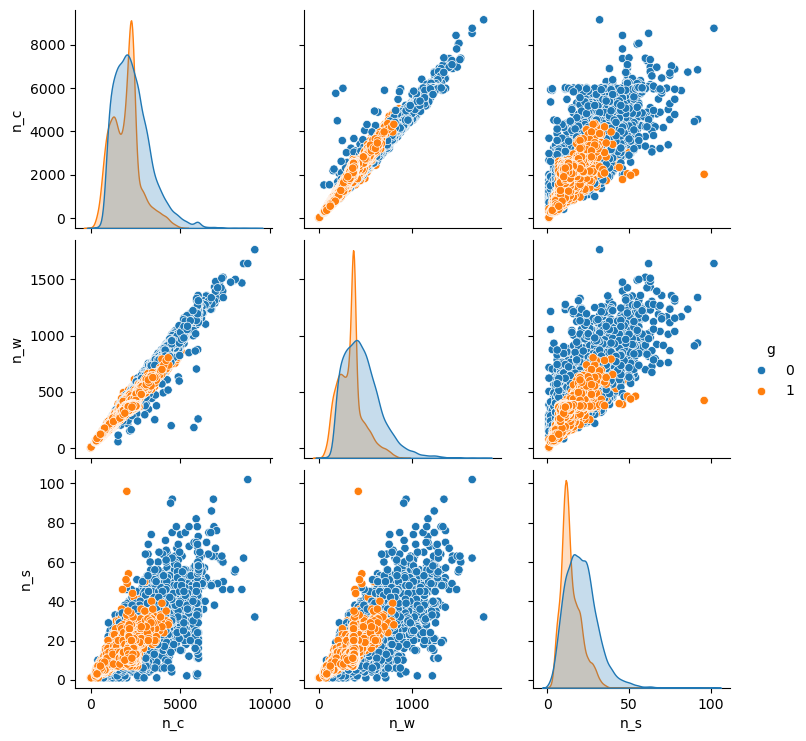

In [51]:
sns.pairplot(df,hue="g")

In [54]:
df[["g","n_c","n_w","n_s"]].corr()

,g,n_c,n_w,n_s
g,1.000000,-0.199951,-0.323510,-0.347531
n_c,-0.199951,1.000000,0.977358,0.787285
n_w,-0.323510,0.977358,1.000000,0.833933
n_s,-0.347531,0.787285,0.833933,1.000000


<Axes: >

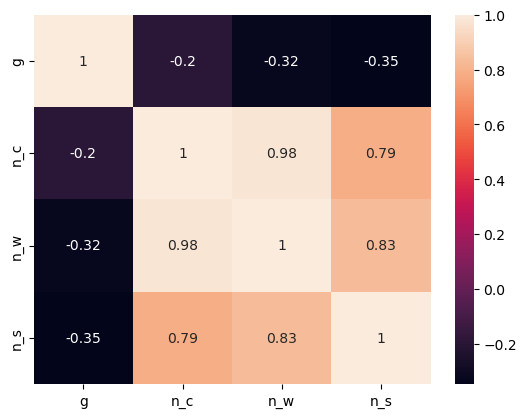

In [56]:
sns.heatmap(df[["g","n_c","n_w","n_s"]].corr(),annot=True)

#### **Since the multicollinearity is present, I will keep only one column i.e., n_s because of its variability wrt "g"**

# Text Preprocessing

In [60]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [62]:
list(stop_words)[:10]

["it'll",
 'other',
 'under',
 'when',
 'yourself',
 "wouldn't",
 "needn't",
 'few',
 "haven't",
 'm']

In [64]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)  # keeps only letters and spaces

    # 3. Tokenize
    words = nltk.word_tokenize(text)

    # 4. Remove stopwords
    words = [word for word in words if word not in stop_words]

    # 5. Remove special characters
    words = [word for word in words if word.isalnum()==1]

    # 6. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    # 7. Re-join words into a string
    return ' '.join(words)

In [68]:
for i in range(len(df)):
    df["text"][i]=preprocess_text(df["text"][i])

In [71]:
preprocess_text("hey, what is your name?")

'hey name'

In [73]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [75]:
AI_wc=wc.generate(df[df["g"]==1]["text"].str.cat(sep=" "))

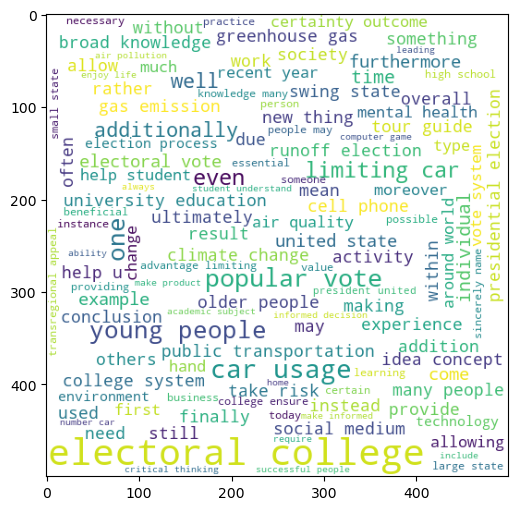

In [76]:
plt.figure(figsize=(6,6))
plt.imshow(AI_wc)

In [78]:
Human_wc=wc.generate(df[df["g"]==0]["text"].str.cat(sep=" "))

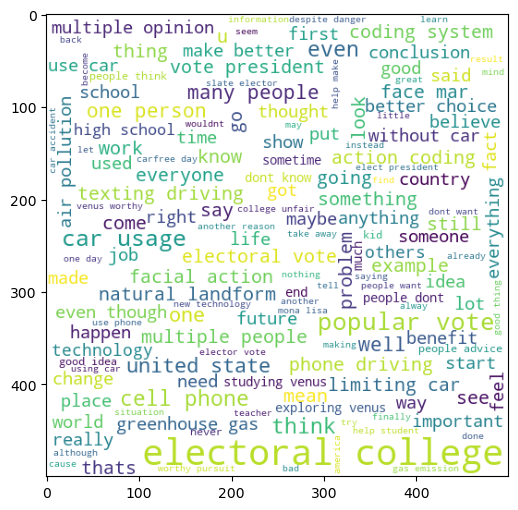

In [82]:
plt.figure(figsize=(6,6))
plt.imshow(Human_wc)

#### **Clearly, word cloud is not a distinguishing factor**

# Feature Engineering

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [90]:
X=tfidf.fit_transform(df["text"]).toarray()

In [92]:
y=df["g"].values

In [94]:
X.shape

(27340, 78020)

# Model Building

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [159]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score,classification_report

In [103]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [115]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

0.9173372348207754
[[2858  365]
 [  87 2158]]
0.8553309552120492


In [165]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("Precision :", precision_score(y_test,y_pred1))
print("Recall :",recall_score(y_test,y_pred1))
print("f1 score :",f1_score(y_test,y_pred1))
print(classification_report(y_test, y_pred1, target_names=["Human", "AI"]))

0.9173372348207754
[[2858  365]
 [  87 2158]]
Precision : 0.8553309552120492
Recall : 0.9612472160356348
f1 score : 0.9052013422818792
              precision    recall  f1-score   support

       Human       0.97      0.89      0.93      3223
          AI       0.86      0.96      0.91      2245

    accuracy                           0.92      5468
   macro avg       0.91      0.92      0.92      5468
weighted avg       0.92      0.92      0.92      5468



In [119]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

In [163]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("Precision :", precision_score(y_test,y_pred2))
print("Recall :",recall_score(y_test,y_pred2))
print("f1 score :",f1_score(y_test,y_pred2))
print(classification_report(y_test, y_pred2, target_names=["Human", "AI"]))

0.9690929041697147
[[3194   29]
 [ 140 2105]]
Precision : 0.9864104967197751
Recall : 0.9376391982182628
f1 score : 0.9614067138616122
              precision    recall  f1-score   support

       Human       0.96      0.99      0.97      3223
          AI       0.99      0.94      0.96      2245

    accuracy                           0.97      5468
   macro avg       0.97      0.96      0.97      5468
weighted avg       0.97      0.97      0.97      5468



In [125]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [161]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("Precision :", precision_score(y_test,y_pred3))
print("Recall :",recall_score(y_test,y_pred3))
print("f1 score :",f1_score(y_test,y_pred3))
print(classification_report(y_test, y_pred3, target_names=["Human", "AI"]))

0.9709217264081931
[[3171   52]
 [ 107 2138]]
Precision : 0.9762557077625571
Recall : 0.9523385300668151
f1 score : 0.9641488162344983
              precision    recall  f1-score   support

       Human       0.97      0.98      0.98      3223
          AI       0.98      0.95      0.96      2245

    accuracy                           0.97      5468
   macro avg       0.97      0.97      0.97      5468
weighted avg       0.97      0.97      0.97      5468



In [175]:
# === ML Model Imports ===

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier



In [169]:
rf=RandomForestClassifier()
xgb=XGBClassifier()


In [171]:
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

In [172]:
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print("Precision :", precision_score(y_test,y_pred4))
print("Recall :",recall_score(y_test,y_pred4))
print("f1 score :",f1_score(y_test,y_pred4))
print(classification_report(y_test, y_pred4, target_names=["Human", "AI"]))

0.9846378931967813
[[3208   15]
 [  69 2176]]
Precision : 0.9931538110451849
Recall : 0.9692650334075724
f1 score : 0.9810640216411182
              precision    recall  f1-score   support

       Human       0.98      1.00      0.99      3223
          AI       0.99      0.97      0.98      2245

    accuracy                           0.98      5468
   macro avg       0.99      0.98      0.98      5468
weighted avg       0.98      0.98      0.98      5468



In [173]:
xgb.fit(X_train,y_train)
y_pred5=xgb.predict(X_test)

In [174]:
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print("Precision :", precision_score(y_test,y_pred5))
print("Recall :",recall_score(y_test,y_pred5))
print("f1 score :",f1_score(y_test,y_pred5))
print(classification_report(y_test, y_pred5, target_names=["Human", "AI"]))

0.9893928310168252
[[3206   17]
 [  41 2204]]
Precision : 0.9923457901846016
Recall : 0.9817371937639198
f1 score : 0.987012987012987
              precision    recall  f1-score   support

       Human       0.99      0.99      0.99      3223
          AI       0.99      0.98      0.99      2245

    accuracy                           0.99      5468
   macro avg       0.99      0.99      0.99      5468
weighted avg       0.99      0.99      0.99      5468



## Random Forest is the best model with Recall 1 

# Adding extra column as no. of sentences

In [216]:
X_df = pd.DataFrame(X)

# Step 2: Add the new column
X_df["n_s"] = df["n_s"].values

In [247]:
X_df=X_df.astype(int)

In [249]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,78011,78012,78013,78014,78015,78016,78017,78018,78019,n_s
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
27336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
27337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
27338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df[:20000],y[:20000],test_size=0.2,random_state=42)

In [239]:
xgb.fit(X_train,y_train)
y_pred6=xgb.predict(X_test)

In [240]:
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print("Precision :", precision_score(y_test,y_pred6))
print("Recall :",recall_score(y_test,y_pred6))
print("f1 score :",f1_score(y_test,y_pred6))
print(classification_report(y_test, y_pred6, target_names=["Human", "AI"]))

0.9915
[[3234    3]
 [  31  732]]
Precision : 0.9959183673469387
Recall : 0.9593709043250328
f1 score : 0.9773030707610146
              precision    recall  f1-score   support

       Human       0.99      1.00      0.99      3237
          AI       1.00      0.96      0.98       763

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000

